In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#df_depression = df[df['condition']=='Depression']
#df_depression
def clean(text):
  text = re.sub('[^A-Za-z]+', ' ', text)
  return text

def select_condition(data, condition_name):
    dataframe = data[data['condition']==condition_name]
    return dataframe

def drug_average_rating(Data):
    drugname =[]
    averagerating = []
    usefulCount = []
    for i in Data['drugName'].unique():
        df = Data[Data['drugName']==i]
        drugname.append(i)
        averagerating.append(df.rating.mean())
        usefulCount.append(df.usefulCount.sum())
    lst= [drugname,averagerating]
    new = pd.DataFrame({'drugname': drugname, 'averagerating': averagerating, 'usefulCount':usefulCount})
    return new

def top_ratings_function(Data, set_a_range_under_max):
    set_a_range_under_max = set_a_range_under_max
    highest_value = Data['usefulCount'].max()
    valuestart = Data['usefulCount'].max()-set_a_range_under_max
    mx = Data[Data['usefulCount']<=highest_value]
    mx = Data[Data['usefulCount']>=valuestart]
    return mx

def select_condition_and_topratings(Data, condition, value_range_under_max):
    df_new = select_condition(Data, condition)
    r_d = drug_average_rating(df_new)
    out = top_ratings_function(r_d, value_range_under_max)
    return out

In [ ]:
#condition-drug-sentiment analysis(drug) mean/rating//drug
#1. create a fuction that : for every condition creates a data frame containing all the drugs
#2. apply sentiment analysis 


In [ ]:
df = pd.read_csv('/drugsComTest_raw.csv')
df_1 = pd.read_csv('/drugsComTrain_raw.csv')
df = pd.concat([df, df_1])
df = df.head(250000)

In [ ]:
df['reviewclean'] = df['review'].apply(clean)
df["drugName"].unique()

array(['Mirtazapine', 'Mesalamine', 'Bactrim', ..., 'Mavik', 'Aldomet',
       'Grifulvin V'], dtype=object)

In [ ]:
df1 = pd.get_dummies(df.drugName, prefix='Drug')
df1.tail()

,Drug_A + D Cracked Skin Relief,Drug_A / B Otic,Drug_Abacavir / dolutegravir / lamivudine,Drug_Abacavir / lamivudine,Drug_Abacavir / lamivudine / zidovudine,Drug_Abatacept,Drug_Abilify,Drug_Abilify Discmelt,Drug_Abilify Maintena,Drug_Abiraterone,...,Drug_Zyrtec,Drug_Zyrtec-D,Drug_Zyrtec-D 12 Hour,Drug_Zytiga,Drug_Zyvox,Drug_ZzzQuil,Drug_depo-subQ provera 104,Drug_ella,Drug_femhrt,Drug_pHisoHex
161292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 161296
Columns: 3671 entries, Drug_A + D Cracked Skin Relief to Drug_pHisoHex
dtypes: uint8(3671)
memory usage: 754.6 MB


In [ ]:
df = pd.concat([df,df1], axis=1)
df = df.drop(columns = ["review"])
df2 = pd.get_dummies(df.condition, prefix='condition')
df2

,condition_0</span> users found this comment helpful.,condition_100</span> users found this comment helpful.,condition_105</span> users found this comment helpful.,condition_10</span> users found this comment helpful.,condition_110</span> users found this comment helpful.,condition_11</span> users found this comment helpful.,condition_121</span> users found this comment helpful.,condition_123</span> users found this comment helpful.,condition_12</span> users found this comment helpful.,condition_135</span> users found this comment helpful.,...,condition_moterol),condition_mulation) (phenylephrine),condition_t Care,condition_t Pac with Cyclobenzaprine (cyclobenzaprine),condition_tic (mycophenolic acid),condition_unctional Gastric Disorde,condition_ungal Infection Prophylaxis,condition_ungal Pneumonia,condition_von Willebrand's Disease,condition_zen Shoulde
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
####List of conditions
df = pd.concat([df,df2], axis=1)
df.condition.unique()

array(['Depression', "Crohn's Disease, Maintenance",
       'Urinary Tract Infection', 'Weight Loss', 'Birth Control',
       'Keratosis', 'Migraine Prevention', 'Opiate Withdrawal',
       'Hot Flashes', 'Vaginal Yeast Infection',
       'Schizoaffective Disorde', 'Insomnia', 'Narcolepsy',
       'Smoking Cessation', 'Acne', 'Bipolar Disorde',
       'Irritable Bowel Syndrome', 'Keratoconjunctivitis Sicca',
       'Hyperhidrosis', 'Panic Disorde', 'Onychomycosis, Fingernail',
       'Rosacea', 'Bowel Preparation', 'Constipation, Drug Induced', nan,
       'Diabetes, Type 2', 'Pain', 'Lipodystrophy', 'Alcohol Dependence',
       'Emergency Contraception', 'Major Depressive Disorde', 'Anxiety',
       'Bladder Infection', 'Benign Prostatic Hyperplasia',
       'Rheumatoid Arthritis', 'Endometriosis', 'ADHD',
       'Restless Legs Syndrome', 'Conjunctivitis, Allergic',
       "Raynaud's Syndrome", 'Schizophrenia', 'Diabetes, Type 1',
       'Kidney Infections', 'Generalized Anxiety Disor

In [ ]:
##############################################################################################
### sellect Condition#############################################################################
mx = select_condition_and_topratings(df, 'Depression', 600)
print(mx.shape)
mx

(1, 3)


,drugname,averagerating,usefulCount
5,Bupropion,7.386881,41677


<BarContainer object of 0 artists>

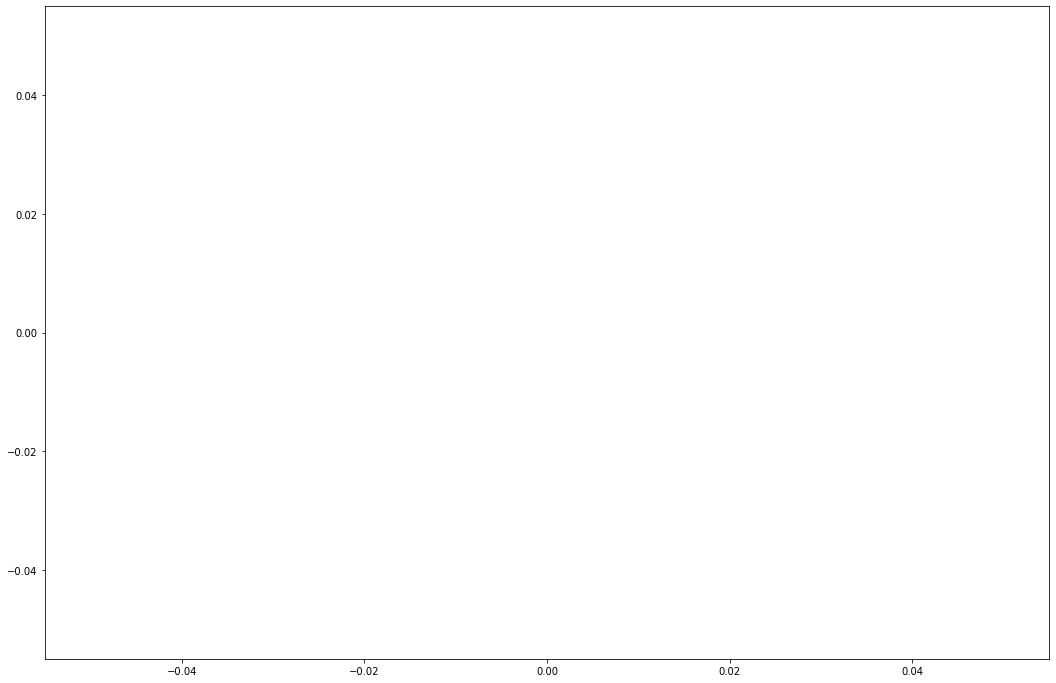

In [ ]:
plt.figure(figsize=(18,12))
plt.bar(mx.drugname, mx.averagerating)

In [ ]:
import nltk
from nltk import word_tokenize 
nltk.download('punkt')
nltk.download('all')

from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_d

True

In [ ]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [ ]:
df['POS_tag'] = df['reviewclean'].apply(token_stop_pos)
df

,uniqueID,drugName,condition,rating,date,usefulCount,reviewclean,Drug_A + D Cracked Skin Relief,Drug_A / B Otic,Drug_Abacavir / dolutegravir / lamivudine,...,condition_min),condition_mis,condition_moterol / mometasone),condition_moterol),condition_mulation) (phenylephrine),condition_t Pac with Cyclobenzaprine (cyclobenzaprine),condition_tic (mycophenolic acid),condition_von Willebrand's Disease,condition_zen Shoulde,POS_tag
0,206461,Valsartan,Left Ventricular Dysfunction,9,20-May-12,27,It has no side effect I take it in combinatio...,0,0,0,...,0,0,0,0,0,0,0,0,0,"[(side, n), (effect, n), (take, v), (combinati..."
1,95260,Guanfacine,ADHD,8,27-Apr-10,192,My son is halfway through his fourth week of ...,0,0,0,...,0,0,0,0,0,0,0,0,0,"[(son, n), (halfway, r), (fourth, a), (week, n..."
2,92703,Lybrel,Birth Control,5,14-Dec-09,17,I used to take another oral contraceptive whi...,0,0,0,...,0,0,0,0,0,0,0,0,0,"[(used, v), (take, v), (another, None), (oral,..."
3,138000,Ortho Evra,Birth Control,8,3-Nov-15,10,This is my first time using any form of birth...,0,0,0,...,0,0,0,0,0,0,0,0,0,"[(first, a), (time, n), (using, v), (form, n),..."
4,35696,Buprenorphine / naloxone,Opiate Dependence,9,27-Nov-16,37,Suboxone has completely turned my life around...,0,0,0,...,0,0,0,0,0,0,0,0,0,"[(Suboxone, n), (completely, r), (turned, v), ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,38791,Esomeprazole,Barrett's Esophagus,6,27-Mar-16,18,Used Nexium for over years You need to stop t...,0,0,0,...,0,0,0,0,0,0,0,0,0,"[(Used, v), (Nexium, n), (years, n), (need, v)..."
49996,169277,Diprivan,Anesthesia,10,5-Jun-14,40,I had my first screening colonoscopy with pro...,0,0,0,...,0,0,0,0,0,0,0,0,0,"[(first, a), (screening, v), (colonoscopy, n),..."
49997,99477,Magnesium sulfate / potassium sulfate / sodium...,Bowel Preparation,10,17-Oct-17,12,THIS is the most vile disgusting putrid thing...,0,0,0,...,0,0,0,0,0,0,0,0,0,"[(vile, a), (disgusting, v), (putrid, a), (thi..."
49998,94876,Abilify,Bipolar Disorde,10,12-Jul-12,48,I have been taking Abilify for nearly two yea...,0,0,0,...,0,0,0,0,0,0,0,0,0,"[(taking, v), (Abilify, n), (nearly, r), (two,..."


In [ ]:
#df.to_csv('/content/drugsComTrain_POS_TAG.csv')
#'#df= pd.read_csv('/content/drugsComTrain_POS_TAG.csv')

In [ ]:
df['POS_tag'].head()

0    [(side, n), (effect, n), (take, v), (combinati...
1    [(son, n), (halfway, r), (fourth, a), (week, n...
2    [(used, v), (take, v), (another, None), (oral,...
3    [(first, a), (time, n), (using, v), (form, n),...
4    [(Suboxone, n), (completely, r), (turned, v), ...
Name: POS_tag, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
          lemma = word
          lemma_rew = lemma_rew + " " + lemma
      else:
          lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
          lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS_tag'].apply(lemmatize)
df.head()

,uniqueID,drugName,condition,rating,date,usefulCount,reviewclean,Drug_A + D Cracked Skin Relief,Drug_A / B Otic,Drug_Abacavir / dolutegravir / lamivudine,...,condition_mis,condition_moterol / mometasone),condition_moterol),condition_mulation) (phenylephrine),condition_t Pac with Cyclobenzaprine (cyclobenzaprine),condition_tic (mycophenolic acid),condition_von Willebrand's Disease,condition_zen Shoulde,POS_tag,Lemma
0,206461,Valsartan,Left Ventricular Dysfunction,9,20-May-12,27,It has no side effect I take it in combinatio...,0,0,0,...,0,0,0,0,0,0,0,0,"[(side, n), (effect, n), (take, v), (combinati...",side effect take combination Bystolic Mg Fis...
1,95260,Guanfacine,ADHD,8,27-Apr-10,192,My son is halfway through his fourth week of ...,0,0,0,...,0,0,0,0,0,0,0,0,"[(son, n), (halfway, r), (fourth, a), (week, n...",son halfway fourth week Intuniv become conce...
2,92703,Lybrel,Birth Control,5,14-Dec-09,17,I used to take another oral contraceptive whi...,0,0,0,...,0,0,0,0,0,0,0,0,"[(used, v), (take, v), (another, None), (oral,...",use take another oral contraceptive pill cyc...
3,138000,Ortho Evra,Birth Control,8,3-Nov-15,10,This is my first time using any form of birth...,0,0,0,...,0,0,0,0,0,0,0,0,"[(first, a), (time, n), (using, v), (form, n),...",first time use form birth control glad go pa...
4,35696,Buprenorphine / naloxone,Opiate Dependence,9,27-Nov-16,37,Suboxone has completely turned my life around...,0,0,0,...,0,0,0,0,0,0,0,0,"[(Suboxone, n), (completely, r), (turned, v), ...",Suboxone completely turn life around feel he...


In [ ]:
print(df['reviewclean'][0])
print(df['Lemma'][0])

 It has no side effect I take it in combination of Bystolic Mg and Fish Oil 
  side effect take combination Bystolic Mg Fish Oil


In [ ]:
df_nlp = df[['reviewclean', 'Lemma', 'rating']]
df_nlp

,reviewclean,Lemma,rating
0,It has no side effect I take it in combinatio...,side effect take combination Bystolic Mg Fis...,9
1,My son is halfway through his fourth week of ...,son halfway fourth week Intuniv become conce...,8
2,I used to take another oral contraceptive whi...,use take another oral contraceptive pill cyc...,5
3,This is my first time using any form of birth...,first time use form birth control glad go pa...,8
4,Suboxone has completely turned my life around...,Suboxone completely turn life around feel he...,9
...,...,...,...
49995,Used Nexium for over years You need to stop t...,Used Nexium year need stop take medication a...,6
49996,I had my first screening colonoscopy with pro...,first screen colonoscopy propofol within sec...,10
49997,THIS is the most vile disgusting putrid thing...,vile disgust putrid thing ever drink year ag...,10
49998,I have been taking Abilify for nearly two yea...,take Abilify nearly two year manage episode ...,10


In [ ]:
from sklearn.model_selection import train_test_split

import tensorflow as tf 
import tensorflow_hub as hub
from tensorflow import keras 

import os
import re
import seaborn as sns

from numpy.linalg import norm

In [ ]:
df_nlp['positive_negative']= df_nlp['rating'].apply(lambda x: 0 if x<6 else x)
df_nlp['positive_negative']= df_nlp['positive_negative'].apply(lambda x: 1 if x>5 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_nlp

,reviewclean,Lemma,rating,positive_negative
0,It has no side effect I take it in combinatio...,side effect take combination Bystolic Mg Fis...,9,1
1,My son is halfway through his fourth week of ...,son halfway fourth week Intuniv become conce...,8,1
2,I used to take another oral contraceptive whi...,use take another oral contraceptive pill cyc...,5,0
3,This is my first time using any form of birth...,first time use form birth control glad go pa...,8,1
4,Suboxone has completely turned my life around...,Suboxone completely turn life around feel he...,9,1
...,...,...,...,...
49995,Used Nexium for over years You need to stop t...,Used Nexium year need stop take medication a...,6,1
49996,I had my first screening colonoscopy with pro...,first screen colonoscopy propofol within sec...,10,1
49997,THIS is the most vile disgusting putrid thing...,vile disgust putrid thing ever drink year ag...,10,1
49998,I have been taking Abilify for nearly two yea...,take Abilify nearly two year manage episode ...,10,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_nlp['Lemma'], df_nlp['positive_negative'], test_size=0.30, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


model_url = 'https://tfhub.dev/google/universal-sentence-encoder/4'
model = hub.load(model_url)


def embed(input):
  return model(input)

In [ ]:
X_train = embed(X_train)
X_test = embed(X_test)
X_val = embed(X_val)

In [ ]:
X_test = tf.convert_to_tensor(X_test)


In [ ]:
X_train = tf.convert_to_tensor(X_train)
X_val = tf.convert_to_tensor(X_val)

In [ ]:
X_train

<tf.Tensor: shape=(26250, 512), dtype=float32, numpy=
array([[-1.6383305e-02, -6.6262059e-02,  4.0356457e-02, ...,
         2.9613279e-02, -5.2848484e-02, -6.1560009e-02],
       [-2.2248751e-02, -9.8791849e-03,  6.8470031e-02, ...,
        -1.5389621e-02, -6.4932212e-02,  3.4771379e-02],
       [-6.9835141e-02, -6.6717722e-02,  3.3254083e-02, ...,
         3.2168850e-02, -5.5596657e-02,  6.8509020e-05],
       ...,
       [-3.1002965e-02, -8.8251941e-02,  2.7712505e-02, ...,
        -4.2764261e-02, -2.5243383e-02, -4.4816695e-02],
       [-4.4600841e-02, -5.7381358e-02,  2.9655378e-02, ...,
         1.9428242e-02, -3.2676163e-03,  5.2149333e-02],
       [ 9.1396896e-03, -7.1112126e-02,  4.7690991e-02, ...,
         5.0487127e-02, -4.1656308e-02, -2.5042914e-02]], dtype=float32)>

Epoch 1/150
821/821 [==============================] - 6s 6ms/step - loss: 0.5186 - accuracy: 0.7275 - val_loss: 0.5020 - val_accuracy: 0.7130
Epoch 2/150
821/821 [==============================] - 4s 5ms/step - loss: 0.4791 - accuracy: 0.7598 - val_loss: 0.4736 - val_accuracy: 0.7562
Epoch 3/150
821/821 [==============================] - 5s 6ms/step - loss: 0.4630 - accuracy: 0.7726 - val_loss: 0.4673 - val_accuracy: 0.7769
Epoch 4/150
821/821 [==============================] - 5s 6ms/step - loss: 0.4521 - accuracy: 0.7821 - val_loss: 0.4683 - val_accuracy: 0.7560
Epoch 5/150
821/821 [==============================] - 4s 5ms/step - loss: 0.4403 - accuracy: 0.7879 - val_loss: 0.4637 - val_accuracy: 0.7734
Epoch 6/150
821/821 [==============================] - 5s 6ms/step - loss: 0.4302 - accuracy: 0.7943 - val_loss: 0.4649 - val_accuracy: 0.7794
Epoch 7/150
821/821 [==============================] - 4s 5ms/step - loss: 0.4208 - accuracy: 0.8004 - val_loss: 0.4707 - val_accuracy: 0.7641

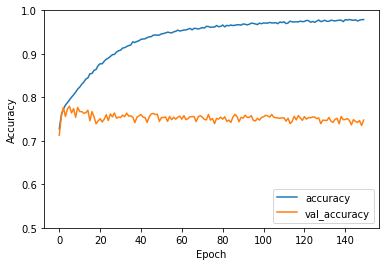

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))

model.add(keras.layers.Dense(1))

model.compile(optimizer='Nadam', loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=150, batch_size=32,
                    validation_data=(X_test, y_test))
# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)